# Pairs Trading

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers = [
    'AAPL','MSFT','AMZN','GOOGL','META','NVDA','TSLA','INTC','AMD','QCOM', 'SPY',
    'ORCL','IBM','CSCO','TXN','AVGO','CRM','SAP', 'BRK-B',
    'NFLX','DIS','CMCSA',
    'VZ','T',
    'KO','PEP','PG','UL',
    'WMT','COST','HD','LOW',
    'NKE','SBUX','MCD','YUM',
    'JNJ','PFE','MRK','GILD','AMGN','LLY','ABBV','UNH','CVS',
    'XOM','CVX','COP','SLB','EOG',
    'JPM','BAC'
]

data = yf.download(tickers, start="2015-01-01", progress=False, auto_adjust=False)['Adj Close']

Example:

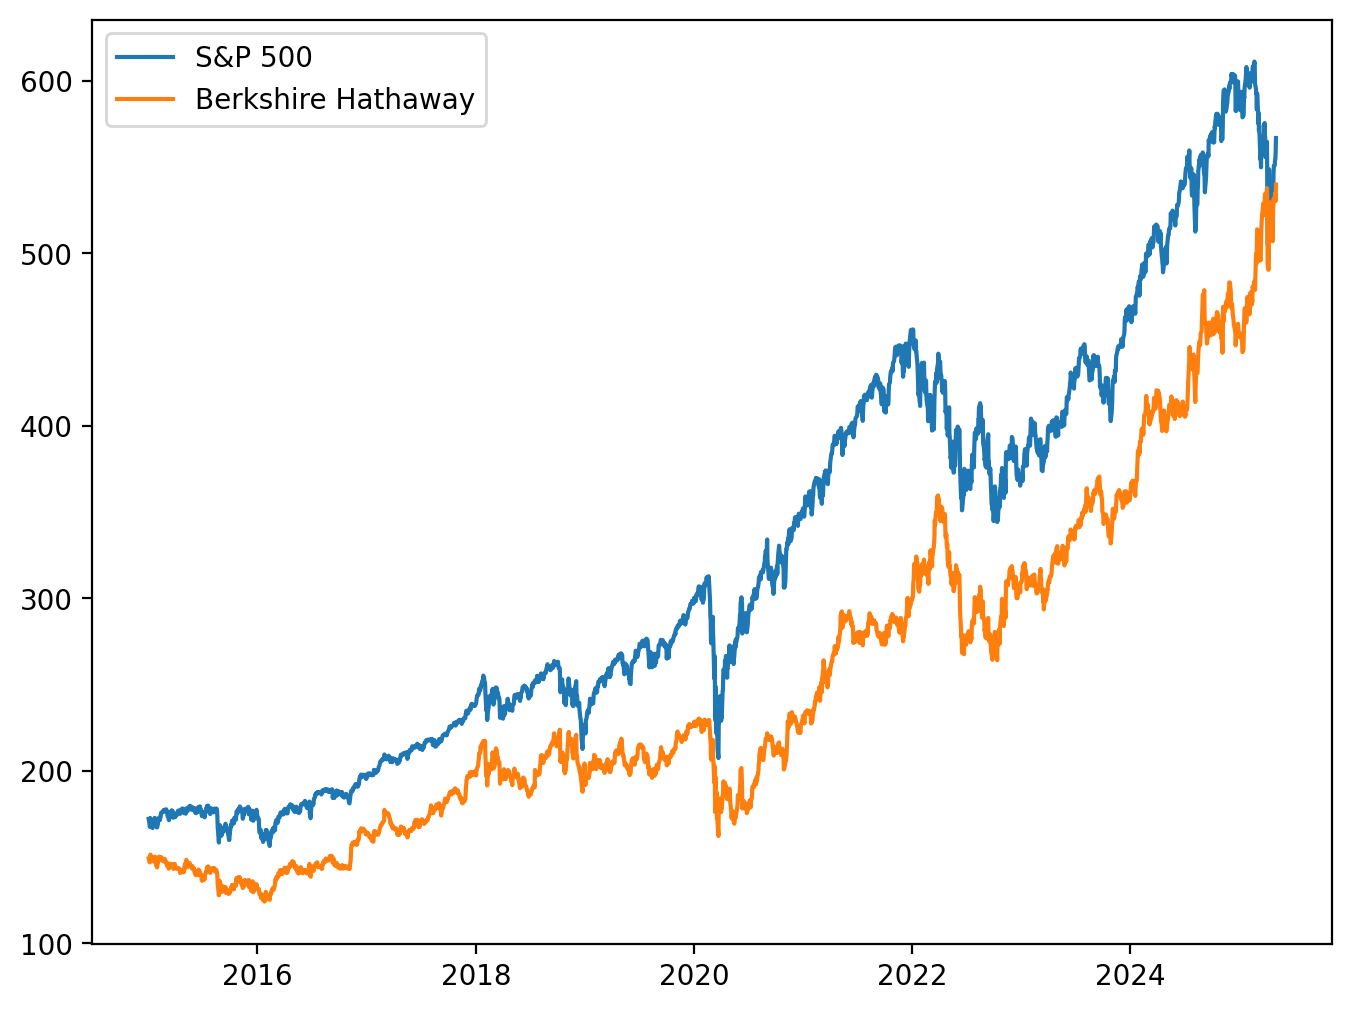

In [3]:
plt.figure(figsize=(8, 6), dpi=200)
SPY = data['SPY'] # S&P 500
BRK_A = data['BRK-B'] # Berkshire Class A share
plt.plot(SPY, label = "S&P 500")
plt.plot(BRK_A, label = "Berkshire Hathaway")
plt.legend()

## CORRELATION

In [4]:
corr_matrix=data.corr()
corr_matrix

Ticker,AAPL,ABBV,AMD,AMGN,AMZN,AVGO,BAC,BRK-B,CMCSA,COP,...,SPY,T,TSLA,TXN,UL,UNH,VZ,WMT,XOM,YUM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.951781,0.941544,0.937388,0.890642,0.869075,0.847513,0.946986,0.658052,0.826113,...,0.979707,0.472452,0.918348,0.946619,0.726911,0.959372,0.376891,0.926546,0.728604,0.925421
ABBV,0.951781,1.000000,0.877193,0.943771,0.809456,0.888169,0.828644,0.971199,0.527393,0.894407,...,0.952004,0.518879,0.819493,0.898197,0.704324,0.950023,0.294874,0.914763,0.834207,0.912357
AMD,0.941544,0.877193,1.000000,0.896105,0.894501,0.790711,0.822204,0.878907,0.728080,0.761241,...,0.941618,0.362709,0.858111,0.922024,0.695184,0.907909,0.443937,0.838642,0.626252,0.892142
AMGN,0.937388,0.943771,0.896105,1.000000,0.867469,0.855928,0.810524,0.932818,0.613932,0.814509,...,0.944023,0.546391,0.771975,0.911510,0.787571,0.931304,0.441466,0.916950,0.719542,0.905380
AMZN,0.890642,0.809456,0.894501,0.867469,1.000000,0.769821,0.881143,0.842086,0.796211,0.588004,...,0.923875,0.525502,0.839886,0.923764,0.836624,0.847368,0.673301,0.883676,0.437275,0.872484
AVGO,0.869075,0.888169,0.790711,0.855928,0.769821,1.000000,0.733584,0.934495,0.397809,0.759551,...,0.901791,0.639947,0.711012,0.756134,0.686879,0.777161,0.248806,0.942638,0.792992,0.784415
BAC,0.847513,0.828644,0.822204,0.810524,0.881143,0.733584,1.000000,0.859291,0.758095,0.679988,...,0.906971,0.565324,0.819483,0.918884,0.781305,0.859718,0.583254,0.827475,0.545769,0.887632
BRK-B,0.946986,0.971199,0.878907,0.932818,0.842086,0.934495,0.859291,1.000000,0.572946,0.861444,...,0.972435,0.598149,0.808551,0.892020,0.759122,0.919159,0.354756,0.953049,0.820102,0.924104
CMCSA,0.658052,0.527393,0.728080,0.613932,0.796211,0.397809,0.758095,0.572946,1.000000,0.343997,...,0.693859,0.344549,0.689569,0.793520,0.710753,0.660668,0.705032,0.568444,0.159701,0.735893


Let's find the most correlated pairs (corr >= 0.85). 

In [5]:
from itertools import combinations

pairs = []
for t1, t2 in combinations(corr_matrix.columns, 2):
    corr_value = corr_matrix.loc[t1, t2]
    if abs(corr_value) >= 0.85:
        pairs.append((t1, t2, corr_value))

pairs_df = pd.DataFrame(pairs, columns=['Ticker1', 'Ticker2', 'Correlation'])
pairs_df = pairs_df.sort_values(by='Correlation', ascending=False)

display(pairs_df)

,Ticker1,Ticker2,Correlation
387,MSFT,SPY,0.986482
258,GOOGL,SPY,0.986080
267,HD,LOW,0.985314
18,AAPL,MSFT,0.982490
15,AAPL,LOW,0.981206
...,...,...,...
242,CVX,YUM,0.852221
253,GOOGL,NFLX,0.851207
333,LLY,LOW,0.851097
195,COST,PEP,0.851012


## STATIONARITY

We found 445 correlated pairs. \
Now we must check for stationarity, so that each candidate spread (or price ratio) is stationary --> Augmented Dickey Fuller (ADF).


$H_0: \phi = 0$: null unit root (not stationary). \
$H_1: \phi < 0$ stationary.

$$t_{\phi=1}= \frac{\hat \phi -1}{SE(\hat \phi)}$$

The p-value is the measure of the evidence against $H_0$ of a unit root (non-stationarity) in a time series. A low p-value indicates that the null hypothesis is unlikely, suggesting the time series is stationary.

In [6]:
stationary_pairs = []
for t1, t2, corr_value in pairs:
    spread = data[t1] - data[t2] # Spread
    adf_result = adfuller(spread.dropna()) # ADF test
    p_value = adf_result[1] # check p-value < 0.05
    if p_value < 0.05:
        stationary_pairs.append((t1, t2, corr_value, p_value))

df_stationary = pd.DataFrame(
    stationary_pairs,
    columns=['Ticker1', 'Ticker2', 'Correlation', 'ADF p-value']
)
df_stationary = df_stationary.sort_values(by='ADF p-value')

print("\n--- Pairs with stationary Spread (ADF p-value < 0.05) ---")
print(df_stationary)


--- Pairs with stationary Spread (ADF p-value < 0.05) ---
   Ticker1 Ticker2  Correlation  ADF p-value
1     AAPL     LOW     0.981206     0.000014
6      AMD   GOOGL     0.942630     0.004007
29      HD    TSLA     0.895320     0.004182
34      PG    QCOM     0.938650     0.004912
15    AMGN     LOW     0.917880     0.005327
30     IBM    NVDA     0.936607     0.005938
0     AAPL    AMGN     0.937388     0.006699
8      AMD    QCOM     0.954841     0.006841
28   GOOGL    QCOM     0.944361     0.008261
35    QCOM     TXN     0.934126     0.008743
20    AMZN     CRM     0.973437     0.009393
5      AMD    AMGN     0.896105     0.010788
13    AMGN   GOOGL     0.910317     0.011303
3     ABBV    AMGN     0.943771     0.011904
10    AMGN    AMZN     0.867469     0.015648
16    AMGN     MCD     0.926103     0.016697
9      AMD     TXN     0.922024     0.017079
33    MSFT     SPY     0.986482     0.018421
23     COP     CVX     0.965188     0.021000
17    AMGN    ORCL     0.890611     0.023

Let's do the same also for the price ratio:

In [7]:
ratio_stationary = []
for idx, row in df_stationary.iterrows():
    t1 = row['Ticker1']
    t2 = row['Ticker2']

    ratio = data[t1] / data[t2]
    adf_ratio = adfuller(ratio.dropna())
    p_value_ratio = adf_ratio[1]
    if p_value_ratio < 0.05:
        ratio_stationary.append((t1, t2, row['Correlation'], p_value_ratio))

df_ratio = pd.DataFrame(
    ratio_stationary,
    columns=['Ticker1', 'Ticker2', 'Correlation', 'ADF_pvalue_ratio']
).sort_values(by='ADF_pvalue_ratio')
print("\n--- Pairs with stationary price ratio (ADF p-value < 0.05) ---")
print(df_ratio)


--- Pairs with stationary price ratio (ADF p-value < 0.05) ---
  Ticker1 Ticker2  Correlation  ADF_pvalue_ratio
5    AMGN    AMZN     0.867469          0.000011
1     IBM    NVDA     0.936607          0.004307
8    ABBV   GOOGL     0.923725          0.006865
2   GOOGL    QCOM     0.944361          0.007912
3    QCOM     TXN     0.934126          0.011638
4    AMZN     CRM     0.973437          0.023266
9     BAC    CSCO     0.904150          0.027694
6    AMGN     MCD     0.926103          0.036362
7    AMGN     CRM     0.854481          0.037229
0      PG    QCOM     0.938650          0.042847


Text(0.5, 1.0, 'Price Ratio between AABV and GOOGLE')

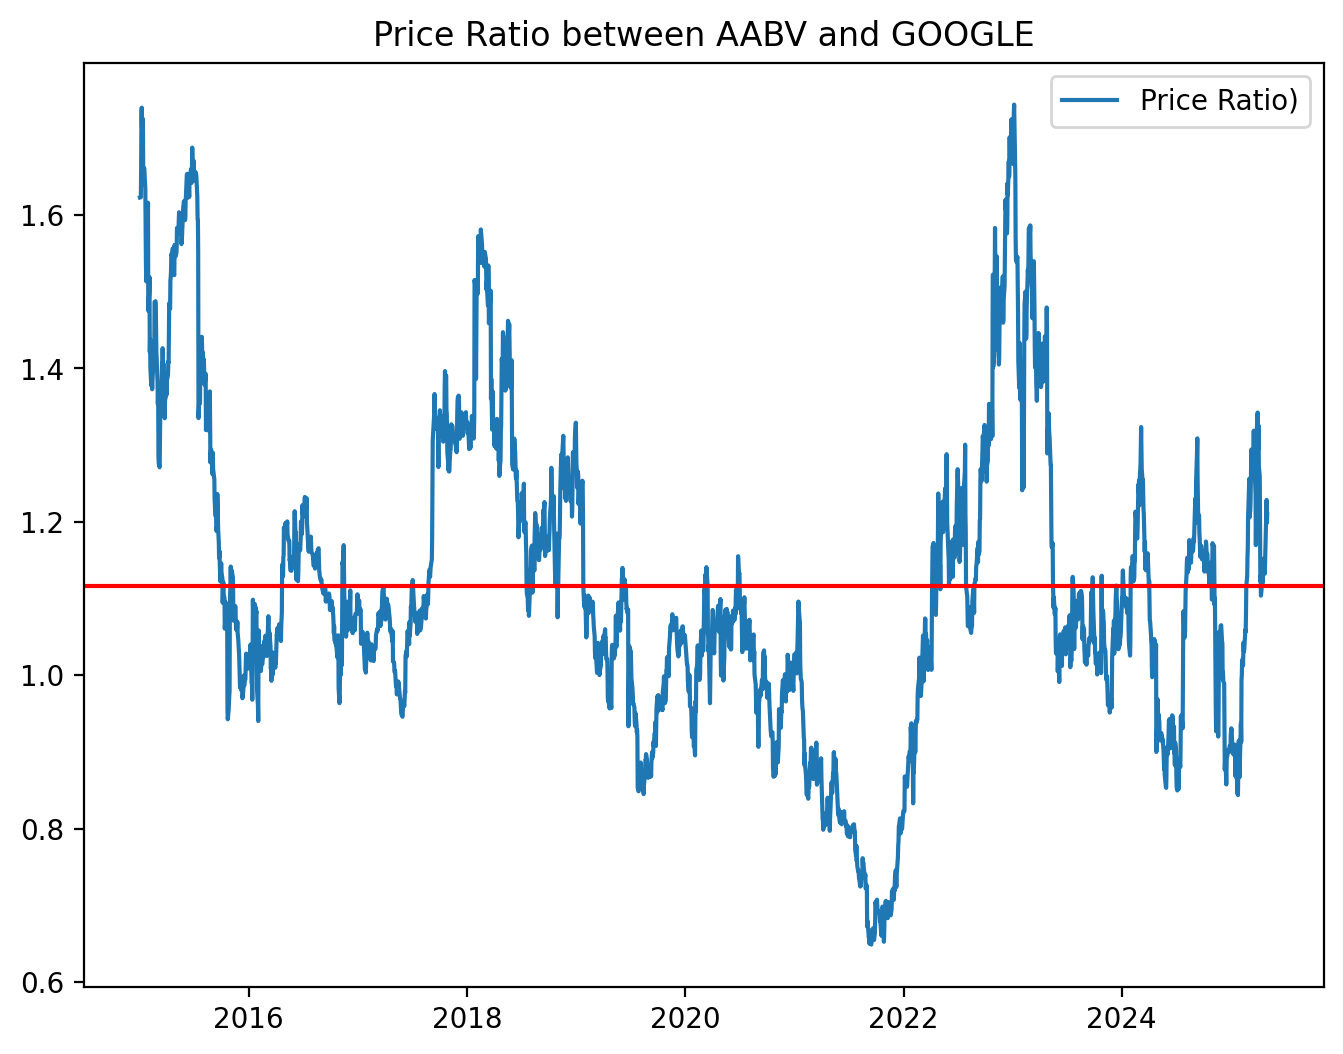

In [8]:
plt.figure(figsize=(8, 6), dpi=200)
ratio = data['ABBV'] / data['GOOGL']
plt.plot(ratio, label = 'Price Ratio)')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between AABV and GOOGLE")

## COINTEGRATION

Cointegration identifies a stable, long-run relationship between two (or more) non-stationary time series. Even if each series wanders on its own (e.g. both are $I(1)$), a specific linear combination can be **stationary** ($I(0)$), meaning the spread reverts to a constant mean. \
It ensures that the two assets will not drift apart indefinitely, moreover, it provides a theoretical foundation for mean-reversion strategies: if the spread diverges, it is likely to return, creating stat-arb opportunities.

For checking the cointegration, we use the Engle-Granger Two-step test:
1. **Step 1: Estimate the long-run relation**  
   $$
     P_{1,t} = \alpha + \beta\,P_{2,t} + \varepsilon_t
   $$  
   Fit an OLS regression of one price on the other, and compute the residuals $\hat\varepsilon_t$.

2. **Step 2: Test residuals for stationarity**  
   Apply an Augmented Dickey–Fuller (ADF) test to $\hat\varepsilon_t$.  
   - **Null hypothesis**: the residuals have a unit root (non-stationary).  
   - **Alternative hypothesis**: the residuals are stationary (cointegrated).



In [9]:
cointegrated = []
for t1, t2, corr_val, p_ratio in ratio_stationary:
    p_val_coint = coint(data[t1], data[t2])[1]
    if p_val_coint < 0.05:
        cointegrated.append((t1, t2, corr_val, p_ratio, p_val_coint))

df_coint = pd.DataFrame(
    cointegrated,
    columns=['Ticker1', 'Ticker2', 'Correlation', 'ADF_pvalue_ratio', 'Coint_pvalue']
).sort_values(by='Coint_pvalue')
print("\n--- Cointegrated pairs (p-value < 0.05) ---")
print(df_coint)


--- Cointegrated pairs (p-value < 0.05) ---
  Ticker1 Ticker2  Correlation  ADF_pvalue_ratio  Coint_pvalue
2    AMZN     CRM     0.973437          0.023266      0.000286
0      PG    QCOM     0.938650          0.042847      0.010567
3    AMGN     MCD     0.926103          0.036362      0.013443
1     IBM    NVDA     0.936607          0.004307      0.045296


## HEDGE RATIO AND Z-SCORE

Now we can choose a Pair and look for the z-score. \
This method has some important limitations:

- **Fixed thresholds**  
  We typically use static levels (e.g. ±2 σ, ±0.5 σ) that assume a constant mean and volatility over time.

- **No explicit mean-reversion model**  
  Z-score ignores the underlying **speed of reversion** (κ) and **long-term mean** (μ) dynamics that an Ornstein–Uhlenbeck framework would capture.

- **Regime sensitivity**  
  During structural market shifts, fixed rolling windows may not adapt quickly enough, leading to **false signals** or **over-trading**.

- **Optimal stopping is absent**  
  There is no theoretical basis for determining “best” entry/exit levels beyond simple statistical bounds.

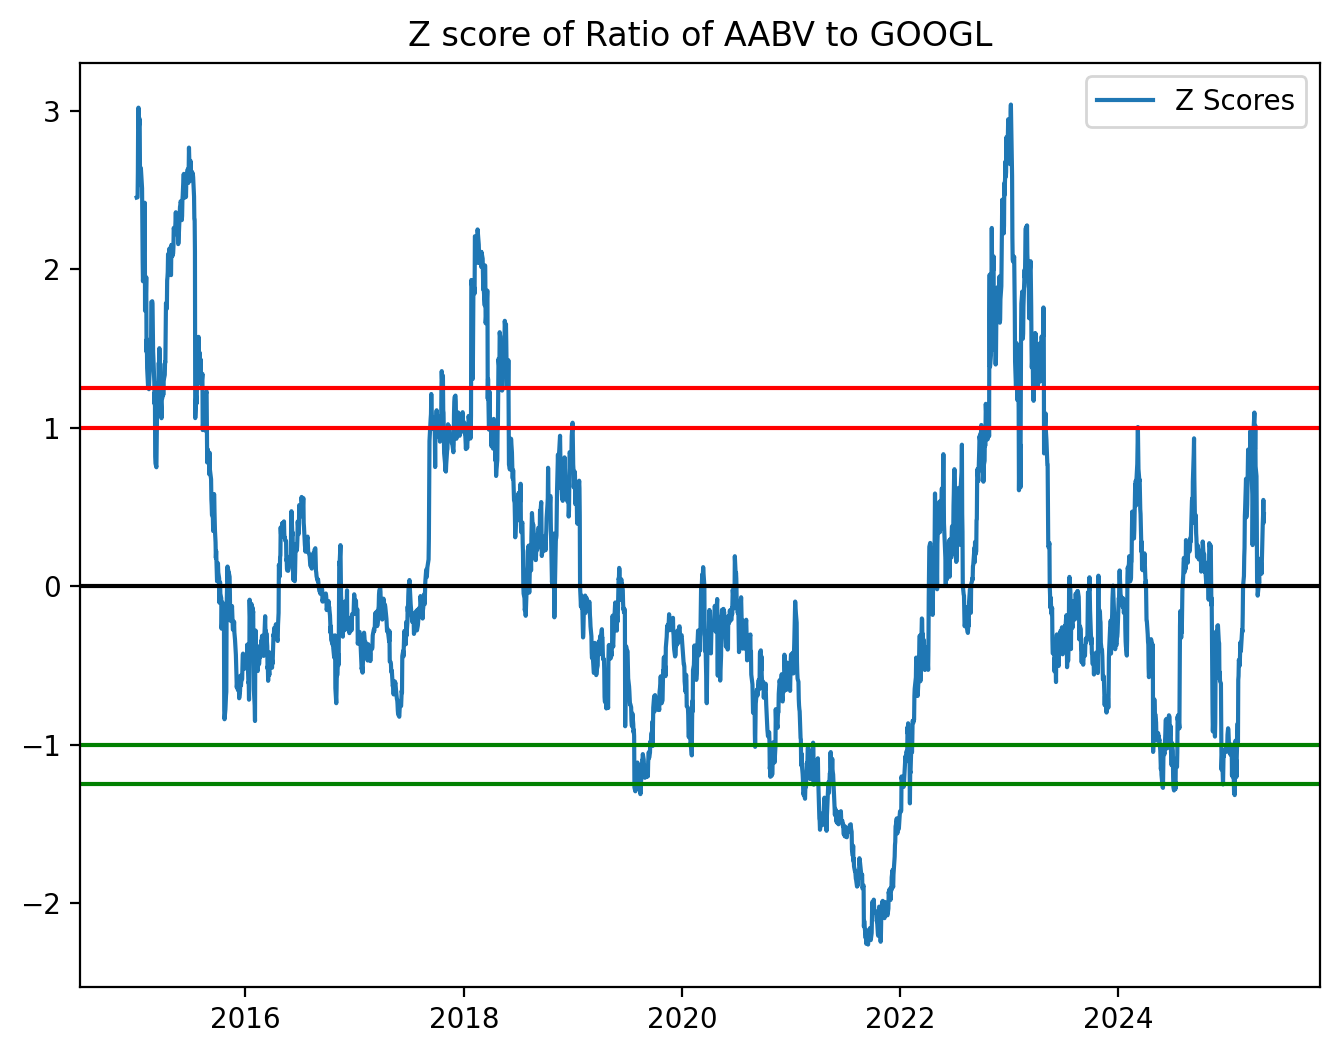

In [10]:
plt.figure(figsize=(8, 6), dpi=200)

df_zscore = (ratio - ratio.mean())/ratio.std() # 'classic' z-score
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of AABV to GOOGL')
plt.show()

Note that the boundary signal (-1.25 and 1.25) is purely arbitrary and can be changed (see code below). 


The classic formula is good if the ratio is stationary, $I(0)$, but if it's not, so the mean and variance are not constant in time, we should use the hedged spread. \
To do so, we must first compute the Hedge Ratio $\beta$, that tells us how many units of T2 "cover" one unit of T1: Spread $= T1_t - \beta T2_t$

In [11]:
hedge_results = []
for t1, t2, *_ in cointegrated:
    X = sm.add_constant(data[t2])
    model = sm.OLS(data[t1], X).fit()
    hedge = model.params[t2]
    spread_hedge = data[t1] - hedge * data[t2]
    z = (spread_hedge - spread_hedge.mean()) / spread_hedge.std()
    hedge_results.append((t1, t2, hedge))

df_hedge = pd.DataFrame(
    hedge_results,
    columns=['Ticker1', 'Ticker2', 'HedgeRatio']
)
print("\n--- Hedge ratios ---")
print(df_hedge)


--- Hedge ratios ---
  Ticker1 Ticker2  HedgeRatio
0      PG    QCOM    0.746907
1     IBM    NVDA    0.934169
2    AMZN     CRM    0.735370
3    AMGN     MCD    0.781013


Let's give a look at the moving averages of the spread (5 days and 20 days). We could implement them in order not to over-trade: long if $z<-2 \space \text{and} \space \text{MA}5 > \text{MA}20$, short if $z>+2 \space \text{and} \space \text{MA}5 < \text{MA}20$. Btw this approach is more conservative, and could lead to lower profits.

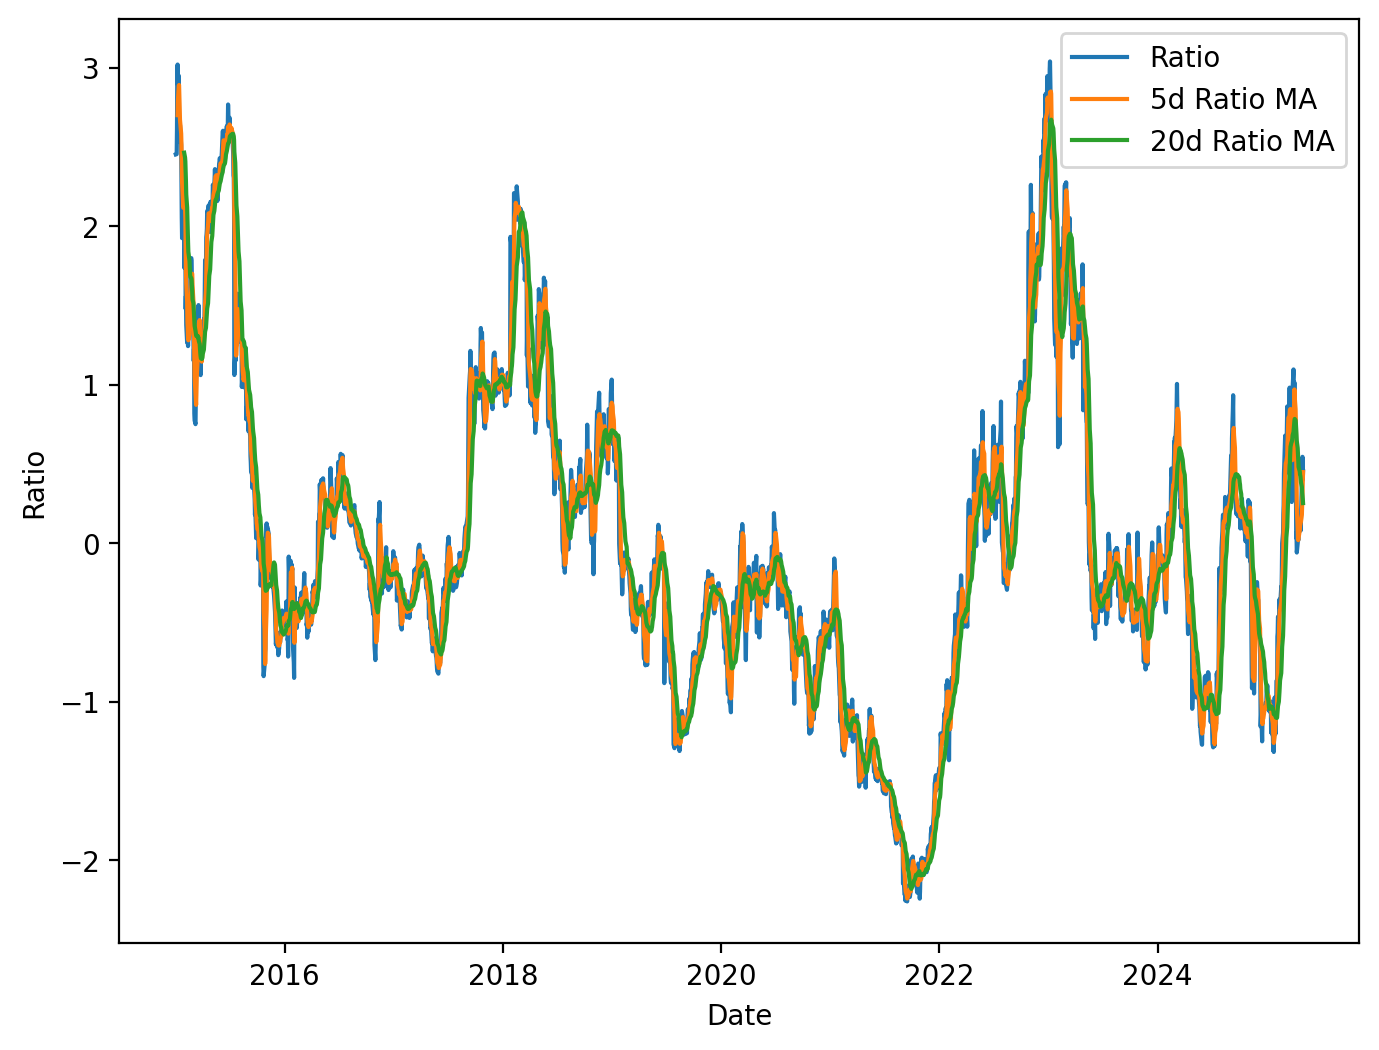

In [12]:
plt.figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = df_zscore.rolling(window=5, center=False).mean()
ratios_mavg20 = df_zscore.rolling(window=20, center=False).mean()
std_20 = df_zscore.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(df_zscore.index, df_zscore.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

Finally we can generate the entry/exit signals.

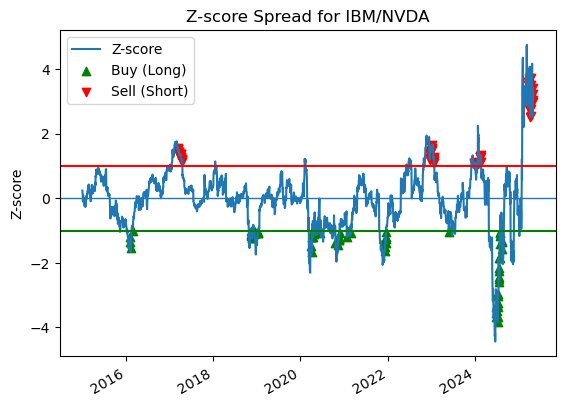

In [59]:
t1, t2 = 'IBM', 'NVDA'

p1 = data[t1]
p2 = data[t2]

spread = p1 - hedge * p2

# Hedge Ratio estimate
try:
    hedge = next(h for x, y, h in hedge_results if x == t1 and y == t2)
except StopIteration:
    X     = sm.add_constant(p2)
    model = sm.OLS(p1, X).fit()
    hedge = model.params[t2]

# Hedge ratio and z-score
spread = p1 - hedge * p2
z = (spread - spread.mean()) / spread.std()

# MA
ma5  = spread.rolling(5).mean()
ma20 = spread.rolling(20).mean()

# Signals (with/without MA)
signals_pair = pd.DataFrame(index=spread.index)
signals_pair['long']  = (z < -1) & (ma5 > ma20)
signals_pair['short'] = (z >  1) & (ma5 < ma20)
signals_pair['exit']  = z.abs() < 0.3

long_idx  = signals_pair.index[signals_pair['long']]
short_idx = signals_pair.index[signals_pair['short']]

# Graph
fig, ax = plt.subplots()
ax.plot(z.index, z, label='Z-score')
ax.axhline(0, linewidth=1)

plt.axhline(1.0, color='red')
#plt.axhline(1.25, color='red') 
plt.axhline(-1.0, color='green') 
#plt.axhline(-1.25, color='green') 

ax.scatter(long_idx, z.loc[long_idx], marker='^', color='green', label='Buy (Long)')
ax.scatter(short_idx, z.loc[short_idx], marker='v', color='red', label='Sell (Short)')

ax.set_title(f'Z-score Spread for {t1}/{t2}')
ax.set_ylabel('Z-score')
ax.legend()
fig.autofmt_xdate()
plt.show()

## BACKTESTING

Sharpe ratio: 0.88
Max Drawdown: -44.95


/var/folders/3s/gk3lt8991f7_369kj0_7nn3r0000gn/T/ipykernel_20951/580143322.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  signals_pair['position'] = signals_pair['signal'].replace(0, method='ffill').shift(1).fillna(0)


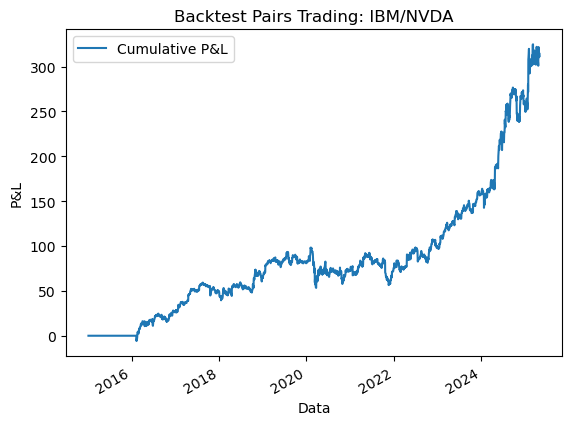

In [60]:
signals_pair['signal'] = 0
signals_pair.loc[signals_pair['long'],  'signal'] =  1
signals_pair.loc[signals_pair['short'], 'signal'] = -1
signals_pair.loc[signals_pair['exit'],  'signal'] =  0

# Shift + forward‐fill to keep the position open untill the exit
signals_pair['position'] = signals_pair['signal'].replace(0, method='ffill').shift(1).fillna(0)

# Daily P&L on the spread
spread_ret = spread.diff().fillna(0)
signals_pair['pnl_raw'] = signals_pair['position'] * spread_ret

# Subtract the transition costs
trade_changes = signals_pair['position'].diff().abs()
cost_per_trade = 0.0005  # example 5 bps
signals_pair['pnl_net'] = signals_pair['pnl_raw'] - trade_changes * cost_per_trade

# Performance
signals_pair['cum_pnl'] = signals_pair['pnl_net'].cumsum()

# Sharpe ratio 
daily_ret = signals_pair['pnl_net']
sharpe = daily_ret.mean() / daily_ret.std() * np.sqrt(252)

# Max drawdown
running_max = signals_pair['cum_pnl'].cummax()
drawdown = signals_pair['cum_pnl'] - running_max
max_dd = drawdown.min()

print(f"Sharpe ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2f}")


# Graph
fig, ax = plt.subplots()
ax.plot(signals_pair.index, signals_pair['cum_pnl'], label='Cumulative P&L')
ax.set_title(f'Backtest Pairs Trading: {t1}/{t2}')
ax.set_xlabel('Data')
ax.set_ylabel('P&L')
ax.legend()
fig.autofmt_xdate()
plt.show()